# Load Train and Test Data

In [1]:
#Saumya Shah
#Jait Purohit

import sklearn.feature_extraction.text as sk_text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from pandas import Series
%matplotlib inline
#reading json file into tabular format
import json
import csv
import pandas as pd
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
import time
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

C:\Users\rutwi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
filename_read = 'data/Chicago_Crimes_2012_to_2017.csv'
df_train = pd.read_csv(filename_read, na_values=['NA','?'])

In [3]:
df_train.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
df_train.shape

(1456714, 23)

In [5]:
df_train['Category']=df_train['Primary Type']

In [6]:
# getting unique counts : Category column
categories = df_train['Category'].unique()
category_dict = {value:index for index,value in enumerate(categories)}
y = df_train['Category'].map(category_dict)
category_dict

{'BATTERY': 0,
 'PUBLIC PEACE VIOLATION': 1,
 'THEFT': 2,
 'WEAPONS VIOLATION': 3,
 'ROBBERY': 4,
 'MOTOR VEHICLE THEFT': 5,
 'ASSAULT': 6,
 'OTHER OFFENSE': 7,
 'DECEPTIVE PRACTICE': 8,
 'CRIMINAL DAMAGE': 9,
 'CRIMINAL TRESPASS': 10,
 'BURGLARY': 11,
 'STALKING': 12,
 'CRIM SEXUAL ASSAULT': 13,
 'NARCOTICS': 14,
 'SEX OFFENSE': 15,
 'OBSCENITY': 16,
 'OFFENSE INVOLVING CHILDREN': 17,
 'KIDNAPPING': 18,
 'HOMICIDE': 19,
 'INTERFERENCE WITH PUBLIC OFFICER': 20,
 'PROSTITUTION': 21,
 'GAMBLING': 22,
 'INTIMIDATION': 23,
 'ARSON': 24,
 'LIQUOR LAW VIOLATION': 25,
 'NON-CRIMINAL': 26,
 'PUBLIC INDECENCY': 27,
 'HUMAN TRAFFICKING': 28,
 'CONCEALED CARRY LICENSE VIOLATION': 29,
 'NON - CRIMINAL': 30,
 'OTHER NARCOTIC VIOLATION': 31,
 'NON-CRIMINAL (SUBJECT SPECIFIED)': 32}

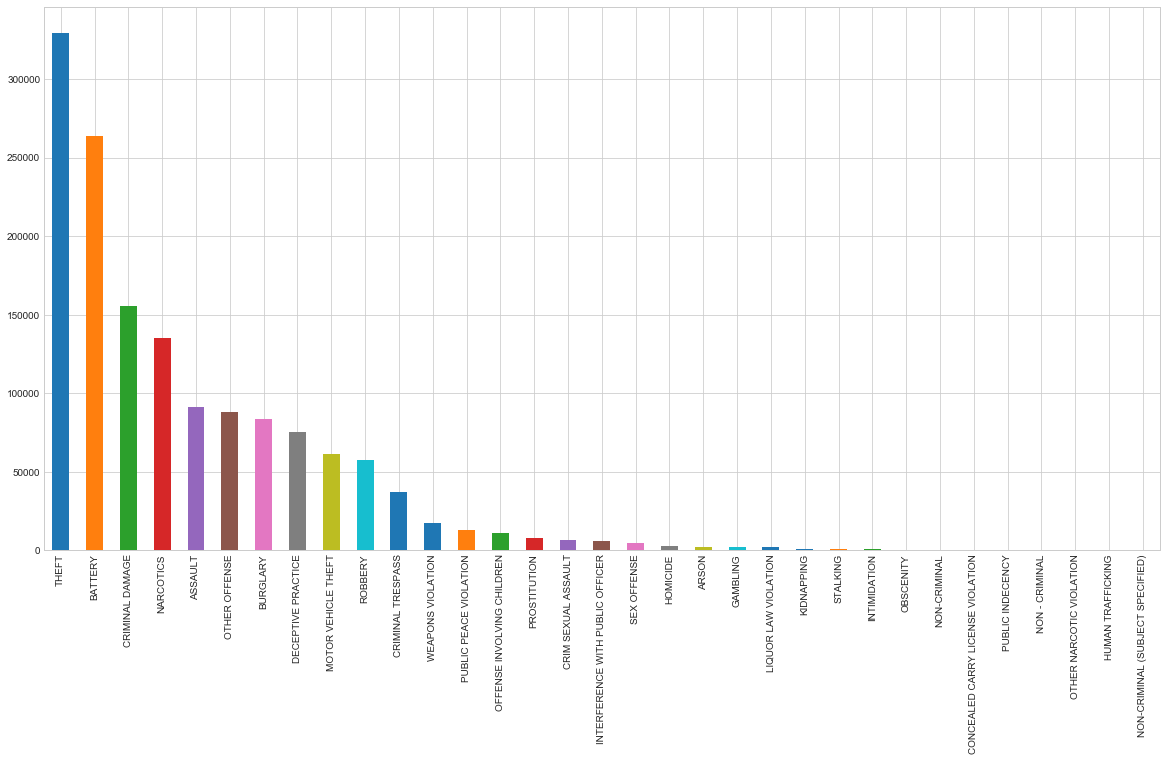

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df_train.Category.value_counts().plot(kind='bar')

In [8]:
topcrime=['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','ASSAULT']
df_train=df_train[df_train.Category.isin(topcrime)]

In [11]:
df_address = df_train['Block'].value_counts()[0:100]

In [12]:
df_address_top = pd.DataFrame({'Block':df_address.index})

In [13]:
add_list=df_address_top.values.T.tolist()

In [14]:
df_train=df_train[df_train.Block.isin(add_list[0])]

In [15]:
df_train.shape

(57926, 24)

In [16]:
df_train['Dates'] = pd.to_datetime(df_train['Date'])

In [17]:
df_train['Year'] = df_train['Dates'].dt.year
df_train['Month'] = df_train['Dates'].dt.month
df_train['Day'] = df_train['Dates'].dt.day
df_train['Hour'] = df_train['Dates'].dt.hour
df_train['Minutes'] = df_train['Dates'].dt.minute
df_train

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Updated On,Latitude,Longitude,Location,Category,Dates,Month,Day,Hour,Minutes
55,11600,10509413,HZ251000,05/04/2016 11:25:00 AM,031XX S ASHLAND AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,...,05/11/2016 03:50:55 PM,41.836385,-87.665710,"(41.836385231, -87.66571041)",CRIMINAL DAMAGE,2016-05-04 11:25:00,5,4,11,25
56,11666,10509422,HZ250945,05/04/2016 11:15:00 AM,083XX S STEWART AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,...,05/11/2016 03:50:55 PM,41.742710,-87.634088,"(41.742710224, -87.634088181)",THEFT,2016-05-04 11:15:00,5,4,11,15
106,23204,10510086,HZ251423,05/03/2016 10:22:00 PM,087XX S BURLEY AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,...,05/10/2016 03:56:50 PM,41.736994,-87.545828,"(41.736993626, -87.545827764)",CRIMINAL DAMAGE,2016-05-03 22:22:00,5,3,22,22
123,28144,10511194,HZ252201,05/03/2016 09:30:00 PM,009XX W BELMONT AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,05/10/2016 03:56:50 PM,41.939941,-87.652087,"(41.93994148, -87.652086737)",CRIMINAL DAMAGE,2016-05-03 21:30:00,5,3,21,30
132,30430,10511516,HZ252310,05/03/2016 02:00:00 PM,031XX W MADISON ST,0890,THEFT,FROM BUILDING,DRUG STORE,False,...,05/10/2016 03:56:50 PM,41.880989,-87.704854,"(41.880988964, -87.704854042)",THEFT,2016-05-03 14:00:00,5,3,14,0
169,40632,10515675,HZ257978,04/04/2016 03:15:00 PM,006XX N MICHIGAN AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,...,05/10/2016 03:56:50 PM,NaN,NaN,NaN,THEFT,2016-04-04 15:15:00,4,4,15,15
190,46637,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)",ASSAULT,2015-05-19 01:12:00,5,19,1,12
243,62782,10508735,HZ250576,05/04/2016 03:00:00 AM,062XX S DR MARTIN LUTHER KING JR DR,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,True,...,05/11/2016 03:50:55 PM,41.781277,-87.615652,"(41.781277428, -87.615652432)",BATTERY,2016-05-04 03:00:00,5,4,3,0
284,77027,10509099,HZ250779,05/04/2016 09:03:00 AM,003XX N CENTRAL AVE,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,SIDEWALK,True,...,05/11/2016 03:50:55 PM,41.886393,-87.765081,"(41.886393351, -87.765080772)",NARCOTICS,2016-05-04 09:03:00,5,4,9,3
290,78380,10509140,HZ250740,05/04/2016 12:30:00 AM,011XX N CLARK ST,0860,THEFT,RETAIL THEFT,DRUG STORE,True,...,05/11/2016 03:50:55 PM,41.903478,-87.631433,"(41.903478069, -87.631433102)",THEFT,2016-05-04 00:30:00,5,4,0,30


In [18]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low


In [19]:
def get_hour_zone(hour):
    if hour >= 2 and hour < 8: 
        return 0
    elif hour >= 8 and hour < 12: 
        return 1
    elif hour >= 12 and hour < 18: 
        return 2
    elif hour >= 18 and hour < 22: 
        return 3
    elif hour < 2 or hour >= 22: 
        return 4
    
df_train["Hour_Zone"] = df_train["Hour"].map(get_hour_zone)

print(sorted(df_train['Hour_Zone'].unique()))

[0, 1, 2, 3, 4]


In [20]:
def get_season(month):
    if month in set([3, 4, 5]): 
        return 0
    elif month in set([6, 7, 8]): 
        return 1
    elif month in set([9, 10, 11]): 
        return 2
    elif month in set([12, 1, 2]): 
        return 3
    
df_train["Season"] = df_train["Month"].map(get_season)

print(sorted(df_train['Season'].unique()))

[0, 1, 2, 3]


In [21]:
onehotcols = ['Season','Hour_Zone','Year','Day','Minutes','Block','District','Ward','Community Area']
for i in onehotcols:
    encode_text_dummy(df_train,i)

In [22]:
le = preprocessing.LabelEncoder()
df_train['encoded_category'] = le.fit_transform(df_train['Category'])

In [24]:
df_train.drop(['Date','Dates', 'Unnamed: 0','ID','Case Number','IUCR','Primary Type','Description','Location Description','Arrest','Domestic','Beat','FBI Code','X Coordinate','Y Coordinate','Updated On','Latitude','Longitude','Location','Category','Month','Hour'], axis=1,inplace=True)

In [25]:
list(df_train.columns.values)

['Season-0',
 'Season-1',
 'Season-2',
 'Season-3',
 'Hour_Zone-0',
 'Hour_Zone-1',
 'Hour_Zone-2',
 'Hour_Zone-3',
 'Hour_Zone-4',
 'Year-2012',
 'Year-2013',
 'Year-2014',
 'Year-2015',
 'Year-2016',
 'Year-2017',
 'Day-1',
 'Day-2',
 'Day-3',
 'Day-4',
 'Day-5',
 'Day-6',
 'Day-7',
 'Day-8',
 'Day-9',
 'Day-10',
 'Day-11',
 'Day-12',
 'Day-13',
 'Day-14',
 'Day-15',
 'Day-16',
 'Day-17',
 'Day-18',
 'Day-19',
 'Day-20',
 'Day-21',
 'Day-22',
 'Day-23',
 'Day-24',
 'Day-25',
 'Day-26',
 'Day-27',
 'Day-28',
 'Day-29',
 'Day-30',
 'Day-31',
 'Minutes-0',
 'Minutes-1',
 'Minutes-2',
 'Minutes-3',
 'Minutes-4',
 'Minutes-5',
 'Minutes-6',
 'Minutes-7',
 'Minutes-8',
 'Minutes-9',
 'Minutes-10',
 'Minutes-11',
 'Minutes-12',
 'Minutes-13',
 'Minutes-14',
 'Minutes-15',
 'Minutes-16',
 'Minutes-17',
 'Minutes-18',
 'Minutes-19',
 'Minutes-20',
 'Minutes-21',
 'Minutes-22',
 'Minutes-23',
 'Minutes-24',
 'Minutes-25',
 'Minutes-26',
 'Minutes-27',
 'Minutes-28',
 'Minutes-29',
 'Minutes-30

# Feature Important Analysis

In [26]:
from sklearn import metrics
import scipy as sp
import numpy as np
import math
from sklearn import metrics

def perturbation_rank(model, x, y, names, regression):
    errors = []

    for i in range(x.shape[1]):
        hold = np.array(x[:, i])
        np.random.shuffle(x[:, i])
        
        if regression:
            pred = model.predict(x)
            error = metrics.mean_squared_error(y, pred)
        else:
            pred = model.predict_proba(x)
            error = metrics.log_loss(y, pred)
            
        errors.append(error)
        x[:, i] = hold
        
    max_error = np.max(errors)
    importance = [e/max_error for e in errors]

    data = {'name':names,'error':errors,'importance':importance}
    result = pd.DataFrame(data, columns = ['name','error','importance'])
    result.sort_values(by=['importance'], ascending=[0], inplace=True)
    result.reset_index(inplace=True, drop=True)
    return result

In [27]:
import pandas as pd
import io
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
import collections 

x,y = to_xy(df_train,"encoded_category")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50))
model.add(Dense(y.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)


Epoch 00007: early stopping


In [28]:
# Rank the features
# from IPython.display import display, HTML

names = list(df_train.columns) # x+y column names
names.remove("encoded_category") # remove the target(y)
rank = perturbation_rank(model, x_test, y_test, names, False)
rank

,name,error,importance
0,Minutes-0,0.911346,1.000000
1,Block-033XX W FILLMORE ST,0.889002,0.975483
2,Hour_Zone-0,0.884011,0.970006
3,Minutes-30,0.877255,0.962593
4,Hour_Zone-2,0.876955,0.962263
5,Block-001XX N STATE ST,0.875019,0.960139
6,Block-0000X N STATE ST,0.874782,0.959879
7,Hour_Zone-4,0.874105,0.959136
8,Block-008XX N MICHIGAN AVE,0.873000,0.957924
9,Block-006XX W OHARE ST,0.872193,0.957038


# Models

In [29]:
traincols = df_train.columns.tolist()
traincols.remove('encoded_category')

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df_train[traincols],df_train['encoded_category'], test_size=0.2, random_state=42)

In [31]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
def print_report(y_pred,y_true):
    print("Accuracy: ", metrics.accuracy_score(y_true,y_pred))
    print("Precision: ", metrics.precision_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("Recall: ", metrics.recall_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("F1_Score: ", metrics.f1_score(y_true,y_pred, pos_label=1, average='weighted'))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    outcome = encode_text_index(df_train,'encoded_category')
    print('Plotting confusion matrix')
    plt.figure()
    plot_confusion_matrix(cm, outcome)
    plt.show()
    print(classification_report(y_true, y_pred))

# Logistic Regression

In [33]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logisticprediction = logreg.predict(x_test)

Accuracy:  0.7243224581391334
Precision:  0.6475256145477227
Recall:  0.7243224581391334
F1_Score:  0.6736541393515623
[[   7  177    0  106  390]
 [   8  593    0  267  829]
 [   0  135    0  104  320]
 [   0  113    0 1480  288]
 [  14  246    0  197 6312]]
Plotting confusion matrix


C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


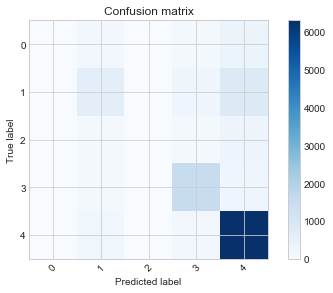

             precision    recall  f1-score   support

          0       0.24      0.01      0.02       680
          1       0.47      0.35      0.40      1697
          2       0.00      0.00      0.00       559
          3       0.69      0.79      0.73      1881
          4       0.78      0.93      0.85      6769

avg / total       0.65      0.72      0.67     11586



C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
print_report(logisticprediction,y_test)

# Nearest Neighbour

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knnprediction = knn.predict(x_test)

Accuracy:  0.6875539444156741
Precision:  0.6433809828652606
Recall:  0.6875539444156741
F1_Score:  0.6609253099474758
[[  70  163   21   89  337]
 [ 108  546   37  237  769]
 [  43  116   29   77  294]
 [  45  190   27 1354  265]
 [ 127  412   45  218 5967]]
Plotting confusion matrix


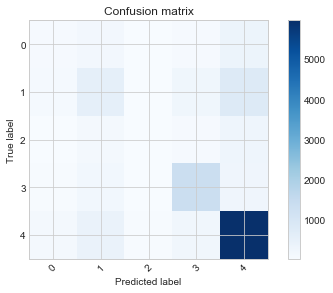

             precision    recall  f1-score   support

          0       0.18      0.10      0.13       680
          1       0.38      0.32      0.35      1697
          2       0.18      0.05      0.08       559
          3       0.69      0.72      0.70      1881
          4       0.78      0.88      0.83      6769

avg / total       0.64      0.69      0.66     11586



In [38]:
print_report(knnprediction,y_test)

# Gaussian NB

In [39]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
gnbprediction = clf.predict(x_test)

Accuracy:  0.5985672363196962
Precision:  0.6471607527369598
Recall:  0.5985672363196962
F1_Score:  0.6007920075478883
[[ 168   79   47  228  158]
 [ 311  257  154  618  357]
 [  55   45   82  215  162]
 [  60   34   19 1694   74]
 [ 663  332  242  798 4734]]
Plotting confusion matrix


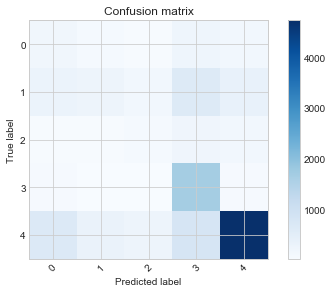

             precision    recall  f1-score   support

          0       0.13      0.25      0.17       680
          1       0.34      0.15      0.21      1697
          2       0.15      0.15      0.15       559
          3       0.48      0.90      0.62      1881
          4       0.86      0.70      0.77      6769

avg / total       0.65      0.60      0.60     11586



In [40]:
print_report(gnbprediction,y_test)

# Random Forest

In [41]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
rfprediction = clf.predict(x_test)

Accuracy:  0.71327464180908
Precision:  0.6574038588866199
Recall:  0.71327464180908
F1_Score:  0.6736972193273092
[[  33  164   12  109  362]
 [  29  586   30  250  802]
 [  11  110   23  101  314]
 [  13  139    8 1443  278]
 [  48  315   24  203 6179]]
Plotting confusion matrix


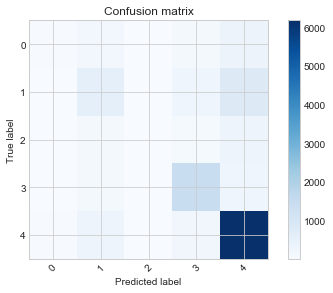

             precision    recall  f1-score   support

          0       0.25      0.05      0.08       680
          1       0.45      0.35      0.39      1697
          2       0.24      0.04      0.07       559
          3       0.69      0.77      0.72      1881
          4       0.78      0.91      0.84      6769

avg / total       0.66      0.71      0.67     11586



In [42]:
print_report(rfprediction,y_test)

# SVC

In [63]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',probability=True)
clf.fit(x_train, y_train)
svmprediction = clf.predict(x_test)

Accuracy:  0.7131020196789228
Precision:  0.6172556537289584
Recall:  0.7131020196789228
F1_Score:  0.6565404093190372
[[   0  163    0  104  413]
 [   0  487    0  252  958]
 [   0  133    0  102  324]
 [   0  110    0 1402  369]
 [   0  205    0  191 6373]]
Plotting confusion matrix


C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


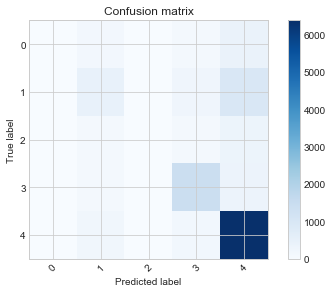

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       680
          1       0.44      0.29      0.35      1697
          2       0.00      0.00      0.00       559
          3       0.68      0.75      0.71      1881
          4       0.76      0.94      0.84      6769

avg / total       0.62      0.71      0.66     11586



C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
print_report(svmprediction,y_test)

# Artificial Neural Network

In [83]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import os
import io
import requests
from sklearn import metrics

x,y = to_xy(df_train, 'encoded_category')
x_train_ann_class, x_test_ann_class, y_train_ann_class, y_test_ann_class = train_test_split(x, y, test_size=0.25, random_state=42)
checkpointer = ModelCheckpoint(filepath="ann/best_weights_fairclass_chicago.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    model = Sequential()
    model.add(Dense(60, input_dim=x.shape[1], activation='sigmoid')) # Hidden 1
    model.add(Dense(45, activation='sigmoid')) # Hidden 2
    model.add(Dense(30, activation='sigmoid')) # Hidden 3
    model.add(Dense(y.shape[1], activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model.fit(x_train_ann_class, y_train_ann_class, validation_data=(x_test_ann_class,y_test_ann_class), callbacks=[monitor,checkpointer], verbose=2, epochs=100)  


Train on 43444 samples, validate on 14482 samples
Epoch 1/100
 - 3s - loss: 0.9507 - val_loss: 0.8558
Epoch 2/100
 - 4s - loss: 0.8247 - val_loss: 0.8386
Epoch 3/100
 - 4s - loss: 0.8165 - val_loss: 0.8353
Epoch 4/100
 - 3s - loss: 0.8131 - val_loss: 0.8355
Epoch 5/100
 - 2s - loss: 0.8113 - val_loss: 0.8353
Epoch 6/100
 - 2s - loss: 0.8095 - val_loss: 0.8321
Epoch 7/100
 - 3s - loss: 0.8079 - val_loss: 0.8304
Epoch 8/100
 - 3s - loss: 0.8052 - val_loss: 0.8309
Epoch 9/100
 - 2s - loss: 0.8021 - val_loss: 0.8255
Epoch 10/100
 - 2s - loss: 0.7991 - val_loss: 0.8220
Epoch 11/100
 - 2s - loss: 0.7958 - val_loss: 0.8220
Epoch 12/100
 - 2s - loss: 0.7926 - val_loss: 0.8226
Epoch 13/100
 - 2s - loss: 0.7901 - val_loss: 0.8194
Epoch 14/100
 - 2s - loss: 0.7878 - val_loss: 0.8237
Epoch 15/100
 - 2s - loss: 0.7862 - val_loss: 0.8185
Epoch 16/100
 - 2s - loss: 0.7843 - val_loss: 0.8155
Epoch 17/100
 - 2s - loss: 0.7828 - val_loss: 0.8190
Epoch 18/100
 - 2s - loss: 0.7810 - val_loss: 0.8214
Epoch

In [84]:
model.load_weights('ann/best_weights_fairclass_chicago.hdf5')
pred = model.predict(x_test_ann_class)
annpred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test_ann_class,axis=1) 

Accuracy:  0.7287667449247341
Precision:  0.6768981826577578
Recall:  0.7287667449247341
F1_Score:  0.6791641137687616
[[   5  209    1  128  482]
 [   3  801    1  289 1033]
 [   0  174    2  106  414]
 [   0  163    1 1795  385]
 [   4  312    2  221 7951]]
Plotting confusion matrix


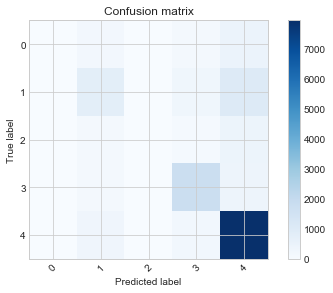

             precision    recall  f1-score   support

          0       0.42      0.01      0.01       825
          1       0.48      0.38      0.42      2127
          2       0.29      0.00      0.01       696
          3       0.71      0.77      0.74      2344
          4       0.77      0.94      0.85      8490

avg / total       0.68      0.73      0.68     14482



In [85]:
print_report(annpred,y_true)

# Convolutional Neural Networks

In [71]:
x,y = to_xy(df_train, 'encoded_category')
x_train, x_test, y_train, y_test = train_test_split(df_train[traincols],df_train['encoded_category'], test_size=0.2, random_state=42)

In [72]:
x_train = x_train.as_matrix()
x_test = x_test.as_matrix()

C:\Users\rutwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\rutwi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [73]:
df_train.shape

(57926, 302)

In [74]:
x_train = x_train.reshape(x_train.shape[0],  301, 1)
x_test = x_test.reshape(x_test.shape[0], 301, 1)

In [75]:
y_train = keras.utils.to_categorical(y_train, y.shape[1])
y_test = keras.utils.to_categorical(y_test, y.shape[1])

In [76]:
batch_size = 64
checkpointer = ModelCheckpoint(filepath="cnn/best_weights_fairclass_chicago.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(2):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=(10), strides=(1),activation='relu',input_shape=(301,1))) 
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(128, (10), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2), strides=None))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam")
    start_time = time.time()
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience =5, verbose=2, mode='auto')
    model.fit(x_train, y_train,batch_size=batch_size,epochs=3,verbose=1,validation_data=(x_test, y_test),callbacks=[monitor,checkpointer])    

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 292, 64)           704       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 146, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 137, 128)          82048     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 68, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8704)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              8913920   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

In [77]:
model.load_weights('cnn/best_weights_fairclass_chicago.hdf5')
y_true = np.argmax(y_test,axis=1)
pred = model.predict(x_test)
cnnprediction = np.argmax(pred,axis=1)

Accuracy:  0.7242361470740549
Precision:  0.6536962657065395
Recall:  0.7242361470740549
F1_Score:  0.6737850657890475
[[  10  177    1  113  379]
 [   6  587    0  281  823]
 [   1  122    0  115  321]
 [   0  119    0 1504  258]
 [  12  230    0  237 6290]]
Plotting confusion matrix


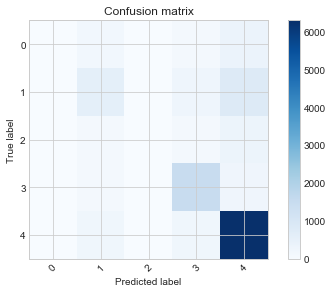

             precision    recall  f1-score   support

          0       0.34      0.01      0.03       680
          1       0.48      0.35      0.40      1697
          2       0.00      0.00      0.00       559
          3       0.67      0.80      0.73      1881
          4       0.78      0.93      0.85      6769

avg / total       0.65      0.72      0.67     11586



In [78]:
print_report(cnnprediction,y_true)

# New Models

In [86]:
x_train, x_test, y_train, y_test = train_test_split(df_train[traincols],df_train['encoded_category'], test_size=0.2, random_state=42)

# AdaBoost Classifier

In [87]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(x_train, y_train)
ada_pred = model.predict(x_test)

Accuracy:  0.7092180217503884
Precision:  0.6289671619761176
Recall:  0.7092180217503884
F1_Score:  0.6535997816530498
[[  10  147    0  101  422]
 [   9  454    0  271  963]
 [   1  126    0  102  330]
 [   0  124    0 1400  357]
 [  18  200    0  198 6353]]
Plotting confusion matrix


C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


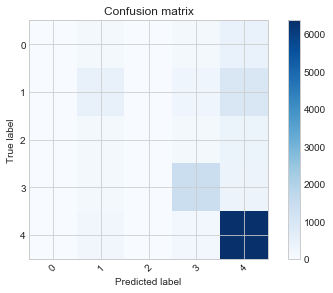

             precision    recall  f1-score   support

          0       0.26      0.01      0.03       680
          1       0.43      0.27      0.33      1697
          2       0.00      0.00      0.00       559
          3       0.68      0.74      0.71      1881
          4       0.75      0.94      0.84      6769

avg / total       0.63      0.71      0.65     11586



C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
print_report(ada_pred,y_test)

# XGBOOST Classifier

In [89]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)
predictions = gbm.predict(x_test)
xgb_pred = model.predict(x_test)

C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy:  0.7092180217503884
Precision:  0.6289671619761176
Recall:  0.7092180217503884
F1_Score:  0.6535997816530498
[[  10  147    0  101  422]
 [   9  454    0  271  963]
 [   1  126    0  102  330]
 [   0  124    0 1400  357]
 [  18  200    0  198 6353]]
Plotting confusion matrix


C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


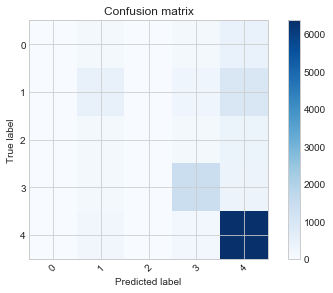

C:\Users\rutwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.26      0.01      0.03       680
          1       0.43      0.27      0.33      1697
          2       0.00      0.00      0.00       559
          3       0.68      0.74      0.71      1881
          4       0.75      0.94      0.84      6769

avg / total       0.63      0.71      0.65     11586



In [90]:
print_report(xgb_pred,y_test)